+ 상품리뷰분석
+ Word Cloud

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('./data/yelp.csv', index_col = 0)

In [72]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


In [74]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [75]:
data.drop(['review_id','user_id','business_id','date'], axis = 1, inplace = True)

In [76]:
data

,stars,text,useful,funny,cool
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,5,This has become our go-to sushi place. The sus...,0,0,0
1139855,1,I was very disappointed with the hotel. The re...,2,1,1
3997153,5,Love this place - super amazing - staff here i...,0,0,0
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0
...,...,...,...,...,...
1567641,5,I'm a sucker for places like this. Get me in f...,3,1,3
4910763,1,Extremely rude staff! Was told 4 min on a lar...,0,0,0
1036315,5,I live in NYC and went to the RTR here in the ...,1,0,0
555962,5,"If you are looking for a trainer, then look no...",0,0,0


In [77]:
len(data.iloc[0]['text'])

347

In [78]:
data['text_length'] = data['text'].apply(len) # 각 obs별 text len

In [79]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,5,This has become our go-to sushi place. The sus...,0,0,0,377
1139855,1,I was very disappointed with the hotel. The re...,2,1,1,663
3997153,5,Love this place - super amazing - staff here i...,0,0,0,141
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0,455


In [80]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

<AxesSubplot:xlabel='stars', ylabel='count'>

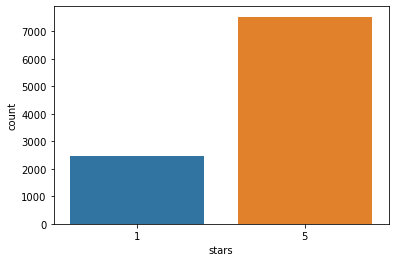

In [81]:
sns.countplot(data['stars'])

<AxesSubplot:xlabel='text_length'>

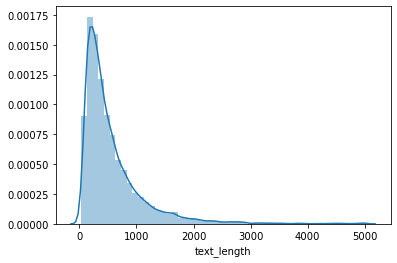

In [82]:
sns.distplot(data['text_length'])

## 1) correlation

In [83]:
data.corr()

,stars,useful,funny,cool,text_length
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_length,-0.221752,0.161592,0.215003,0.193500,1.000000


<AxesSubplot:>

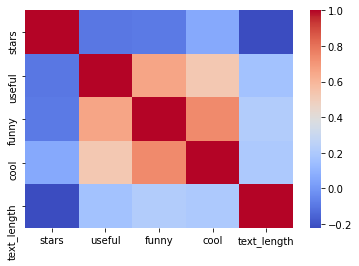

In [84]:
sns.heatmap(data.corr(), cmap = 'coolwarm')

## 2) text에서 기호제거하기

In [85]:
data['text']

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
                                 ...                        
1567641    I'm a sucker for places like this. Get me in f...
4910763    Extremely rude staff!  Was told 4 min on a lar...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer, then look no...
838267     Awesome food. Awesome beer. Awesome service. N...
Name: text, Length: 10000, dtype: object

In [86]:
import string

In [87]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
s = data.iloc[0]['text']

In [89]:
s

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

+ def이용

In [90]:
def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = ''.join(new_s)
    return new_s    

In [91]:
new_s

['love',
 'cheeses',
 'here.',
 'worth',
 'price.',
 'great',
 'finding',
 'treats',
 'special',
 'dinner',
 'picnic.',
 'nice',
 'sample',
 'days.',
 'yum!!!',
 'top',
 'quality',
 'meats.',
 'nice',
 'selection',
 'non',
 'brand',
 'frozen',
 'veggies.',
 'veggie',
 'chips',
 'mega',
 'tasty.',
 'always',
 'quick',
 'friendly',
 'check',
 'out.',
 'produce',
 'stellar',
 'was,',
 'also',
 'finding',
 'better',
 'madison.']

In [92]:
''.join(new_s)  # 공백으로 new_s에 들어있는 string 연결

'lovecheeseshere.worthprice.greatfindingtreatsspecialdinnerpicnic.nicesampledays.yum!!!topqualitymeats.niceselectionnonbrandfrozenveggies.veggiechipsmegatasty.alwaysquickfriendlycheckout.producestellarwas,alsofindingbettermadison.'

In [93]:
data['text'].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

+ 한 번에 처리

In [94]:
''.join([i for i in s if i not in string.punctuation])

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

In [95]:
data['text'] = data['text'].apply(lambda x : ''.join([i for i in x if i not in string.punctuation]))

In [96]:
data

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here They are worth the pric...,0,0,1,347
4773684,5,This has become our goto sushi place The sushi...,0,0,0,377
1139855,1,I was very disappointed with the hotel The res...,2,1,1,663
3997153,5,Love this place super amazing staff here is ...,0,0,0,141
4262000,5,Thank you Dana Having dyed my hair black previ...,0,0,0,455
...,...,...,...,...,...,...
1567641,5,Im a sucker for places like this Get me in fro...,3,1,3,779
4910763,1,Extremely rude staff Was told 4 min on a larg...,0,0,0,268
1036315,5,I live in NYC and went to the RTR here in the ...,1,0,0,1288
555962,5,If you are looking for a trainer then look no ...,0,0,0,1160


## 3) 상투적인 단어 제거하기

In [97]:
from nltk.corpus import stopwords

In [98]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [100]:
data['text']

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [101]:
s

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [102]:
# 공백기준으로 나누기
s.split()

['LOVE',
 'the',
 'cheeses',
 'here.',
 'They',
 'are',
 'worth',
 'the',
 'price.',
 'Great',
 'for',
 'finding',
 'treats',
 'for',
 'a',
 'special',
 'dinner',
 'or',
 'picnic.',
 'Nice',
 'on',
 'sample',
 'days.',
 'Yum!!!',
 'Top',
 'quality',
 'meats.',
 'Nice',
 'selection',
 'of',
 'non',
 'brand',
 'frozen',
 'veggies.',
 'Veggie',
 'chips',
 'are',
 'mega',
 'tasty.',
 'Always',
 'quick',
 'and',
 'friendly',
 'check',
 'out.',
 'Produce',
 'not',
 'as',
 'stellar',
 'as',
 'it',
 'once',
 'was,',
 'but',
 'also',
 'not',
 'finding',
 'better',
 'in',
 'Madison.']

In [103]:
# 대문자 -> 소문자
s.lower()

'love the cheeses here.  they are worth the price.  great for finding treats for a special dinner or picnic.  nice on sample days. yum!!! top quality meats. nice selection of non brand frozen veggies.  veggie chips are mega tasty.  always quick and friendly check out.  produce not as stellar as it once was, but also not finding better in madison.'

In [104]:
# 상투적인 단어 필터링
new_s = []
for i in s.split():
    if i.lower() not in stopwords.words('english'):
        new_s.append(i.lower())

In [105]:
new_s

['love',
 'cheeses',
 'here.',
 'worth',
 'price.',
 'great',
 'finding',
 'treats',
 'special',
 'dinner',
 'picnic.',
 'nice',
 'sample',
 'days.',
 'yum!!!',
 'top',
 'quality',
 'meats.',
 'nice',
 'selection',
 'non',
 'brand',
 'frozen',
 'veggies.',
 'veggie',
 'chips',
 'mega',
 'tasty.',
 'always',
 'quick',
 'friendly',
 'check',
 'out.',
 'produce',
 'stellar',
 'was,',
 'also',
 'finding',
 'better',
 'madison.']

In [106]:
# 상투적인 단어 필터링: 함수
def stop_w(x):
    new_s = []
    for i in s.split():
        if i.lower() not in stopwords.words('english'):
            new_s.append(i.lower())
    return new_s

In [107]:
#data['text'].apply(stop_w)

KeyboardInterrupt: 

In [ ]:
[i.lower() for i in s.split() if i.lower() not in stopwords.words('english')]

In [108]:
data['text'] = data['text'].apply(lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('english')])

## 4) 단어빈도 그래프 및 Word Cloud만들기

In [109]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,"[love, cheeses, worth, price, great, finding, ...",0,0,1,347
4773684,5,"[become, goto, sushi, place, sushi, always, fr...",0,0,0,377
1139855,1,"[disappointed, hotel, restaurants, good, booke...",2,1,1,663
3997153,5,"[love, place, super, amazing, staff, always, f...",0,0,0,141
4262000,5,"[thank, dana, dyed, hair, black, previously, k...",0,0,0,455


In [111]:
word_split = []

for i in range(len(data)):
    for j in data.iloc[i]['text']:
        word_split.append(j)

In [112]:
word_split

['love',
 'cheeses',
 'worth',
 'price',
 'great',
 'finding',
 'treats',
 'special',
 'dinner',
 'picnic',
 'nice',
 'sample',
 'days',
 'yum',
 'top',
 'quality',
 'meats',
 'nice',
 'selection',
 'non',
 'brand',
 'frozen',
 'veggies',
 'veggie',
 'chips',
 'mega',
 'tasty',
 'always',
 'quick',
 'friendly',
 'check',
 'produce',
 'stellar',
 'also',
 'finding',
 'better',
 'madison',
 'become',
 'goto',
 'sushi',
 'place',
 'sushi',
 'always',
 'fresh',
 'delicious',
 'get',
 '30',
 'sushi',
 'platter',
 'perfect',
 'two',
 'people',
 'service',
 'always',
 'fast',
 'servers',
 'pleasant',
 'give',
 'salads',
 'potatoes',
 'wait',
 'food',
 'nice',
 'touch',
 'meal',
 'bring',
 'little',
 'bottles',
 'korean',
 'yoghurt',
 'also',
 'delicious',
 'disappointed',
 'hotel',
 'restaurants',
 'good',
 'booked',
 'eiffel',
 'tower',
 'view',
 'got',
 'room',
 'view',
 'paid',
 'extra',
 'view',
 'put',
 'room',
 'view',
 '18th',
 'floor',
 'excited',
 'pool',
 'plays',
 'loud',
 'music',

In [113]:
len(word_split)

542773

In [114]:
from nltk.probability import FreqDist

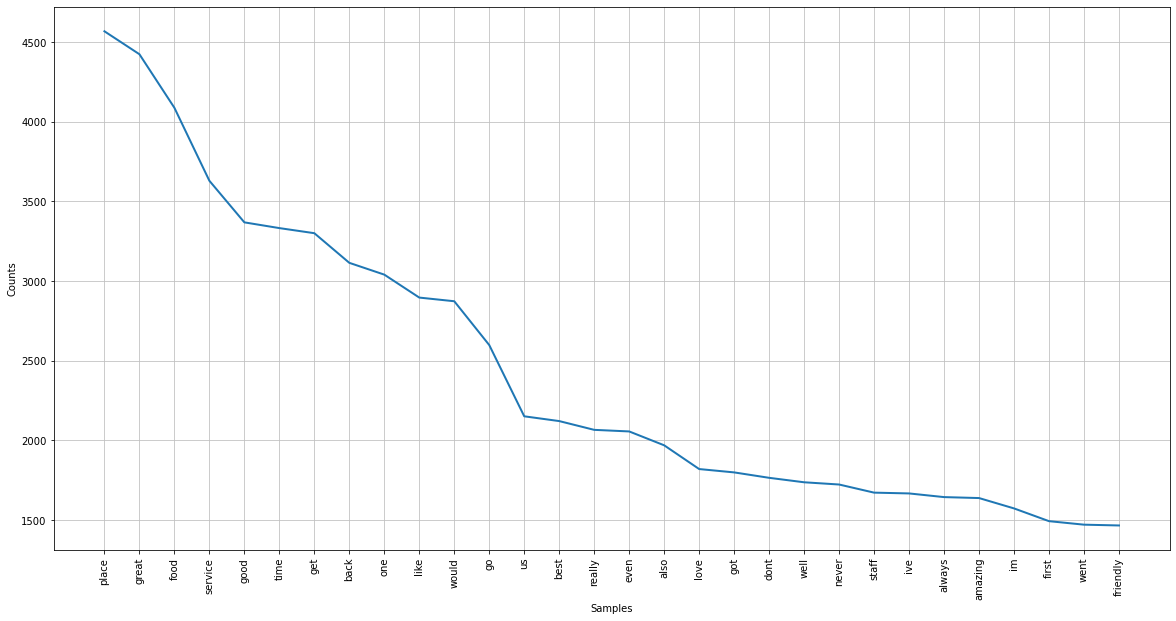

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [115]:
plt.figure(figsize=(20,10))
FreqDist(word_split).plot(30)

+ Word cloud

- 활용사례: Finding Pain Points(불만요소 확인), SEO(관련된 주요 키워드)

In [117]:
# Word Cloud
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

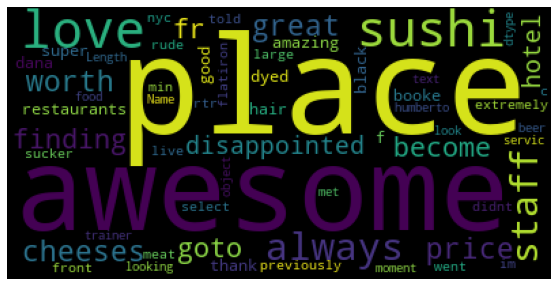

In [121]:
wc = WordCloud().generate(str(data['text']))
plt.figure(figsize = (10,5))
plt.imshow(wc)
plt.axis('off')  # xlable, ylabel delete

In [122]:
data['stars'].value_counts()  # 좋은 리뷰가 많기때문에 의미있는 단어가 많이 추출되었다.

5    7532
1    2468
Name: stars, dtype: int64

In [124]:
good = data[data['stars'] == 5]['text']  # 5점짜리 리뷰만
bad = data[data['stars'] == 1]['text']   # 1점짜리 리뷰만

(-0.5, 399.5, 199.5, -0.5)

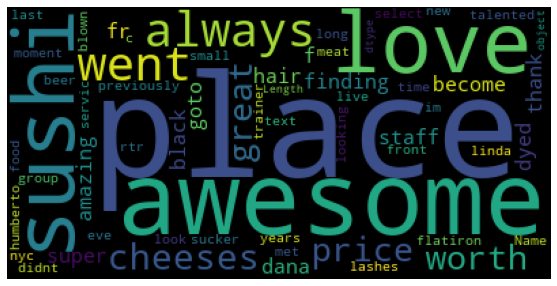

In [125]:
wc = WordCloud().generate(str(good))
plt.figure(figsize = (10,5))
plt.imshow(wc)
plt.axis('off')  # xlable, ylabel delete

(-0.5, 399.5, 199.5, -0.5)

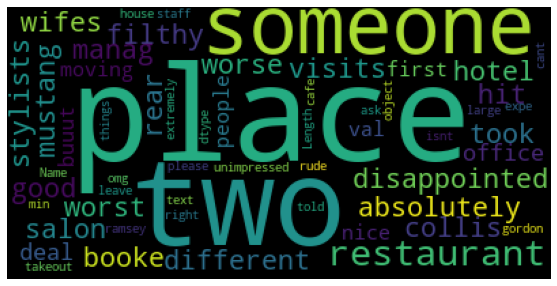

In [126]:
wc = WordCloud().generate(str(bad))
plt.figure(figsize = (10,5))
plt.imshow(wc)
plt.axis('off')  # xlable, ylabel delete

## 5) Naive Bayes

### Navie Bayes Classifier의 장점
+ 각 변수 독립가정 -> fast
+ n < p 일 때 유용함(n 관측치, p 컬럼) -> overfitting 벗어남
+ 딥러닝을 제외하면 텍스트 데이터에 가장 적합(스팸메일 필터링, 감정분석)

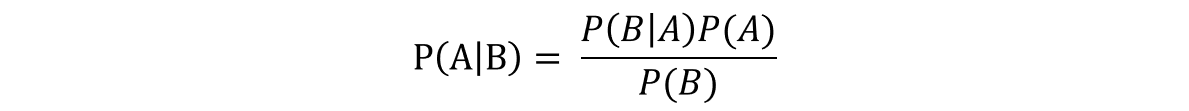

In [184]:
Image('../data/navie_bayes.png')

+ A: 스팸, B: 특정단어

In [127]:
data = pd.read_csv('./data/yelp.csv', index_col = 0)

In [130]:
data.head(5)  # target : starts

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [166]:
X = data['text']
y = data['stars']

+ Count Vectorizer: 단어별 빈도를 계산하여 데이터 프레임으로 정리

In [179]:
from IPython.display import Image

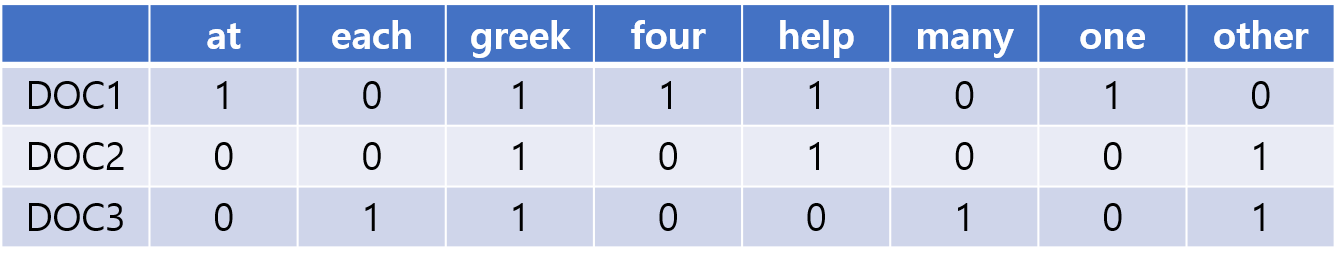

In [183]:
Image('../data/그림1.png')

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
cv = CountVectorizer()

In [168]:
cv.fit(X)

CountVectorizer()

In [169]:
X = cv.transform(X)

In [138]:
# cv.fit_transform(X)  -> 한줄코드

In [139]:
print(X)  # 단어에 라벨부여

  (0, 1423)	1
  (0, 1453)	1
  (0, 1580)	1
  (0, 1905)	2
  (0, 2027)	2
  (0, 3066)	1
  (0, 3694)	1
  (0, 4157)	1
  (0, 4938)	1
  (0, 4975)	1
  (0, 5112)	1
  (0, 6921)	1
  (0, 7535)	1
  (0, 9746)	2
  (0, 10103)	2
  (0, 10370)	1
  (0, 10440)	1
  (0, 11315)	1
  (0, 12016)	1
  (0, 12805)	1
  (0, 13373)	1
  (0, 15023)	1
  (0, 15210)	1
  (0, 15742)	1
  (0, 15791)	1
  :	:
  (9998, 27679)	3
  (9998, 27786)	1
  (9998, 27818)	1
  (9998, 27974)	2
  (9998, 28038)	3
  (9999, 1580)	1
  (9999, 2380)	3
  (9999, 2611)	1
  (9999, 2857)	1
  (9999, 8012)	1
  (9999, 9067)	1
  (9999, 10081)	1
  (9999, 10103)	1
  (9999, 10417)	1
  (9999, 11067)	1
  (9999, 14879)	1
  (9999, 16451)	1
  (9999, 16901)	1
  (9999, 21795)	1
  (9999, 22108)	1
  (9999, 22260)	1
  (9999, 25145)	1
  (9999, 26879)	1
  (9999, 27679)	1
  (9999, 28048)	1


In [140]:
cv.get_feature_names()[1423]

'also'

In [141]:
cv.get_feature_names()[1453]

'always'

In [142]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [144]:
from sklearn.naive_bayes import MultinomialNB

In [145]:
model = MultinomialNB()

In [146]:
model.fit(X_train, y_train)

MultinomialNB()

In [148]:
pred = model.predict(X_test)

In [149]:
pred

array([5, 5, 5, ..., 1, 5, 1], dtype=int64)

In [150]:
y_test

1373705    5
3128713    5
212088     1
1622136    5
2380124    5
          ..
3548316    5
38943      5
2423674    1
1564863    5
3629333    1
Name: stars, Length: 2000, dtype: int64

In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [155]:
accuracy_score(y_test, pred)

0.9265

In [156]:
confusion_matrix(y_test, pred)  # Type1, Type2 Error

array([[ 421,   65],
       [  82, 1432]], dtype=int64)

In [157]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.84      0.87      0.85       486
           5       0.96      0.95      0.95      1514

    accuracy                           0.93      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.93      0.93      0.93      2000



## 6) Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rf = RandomForestClassifier(max_depth =10, n_estimators = 1000)  # tree개수 1000개

In [173]:
pred2 = rf.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [174]:
accuracy_score(y_test, pred2)

NameError: name 'pred2' is not defined

In [177]:
print(confusion_matrix(y_test, pred2))

NameError: name 'pred2' is not defined

### Navie Bayes Classifier의 장점
+ 각 변수 독립가정 -> fast
+ n < p 일 때 유용함(n 관측치, p 컬럼) -> overfitting 벗어남
+ 딥러닝을 제외하면 텍스트 데이터에 가장 적합(스팸메일 필터링, 감정분석)